In [10]:
import numpy as np
from random import random
from functools import reduce
from collections import namedtuple
from queue import PriorityQueue, SimpleQueue
import matplotlib.pyplot as plt

In [11]:
# constants
PROBLEM_SIZE = 5   # dimension of the finite set U
NUMBER_SET = 10     # number of subsets in the collection S

State = namedtuple('State', ['taken','not_taken'])


In [12]:
def goal_check(state,sets):
    """
    check if the logical OR all the elements yeald a line of all true ie the
    condition for a state to be covering the whole set U
    """
    return np.all(reduce(np.logical_or, [sets[i] for i in state.taken], np.zeros(PROBLEM_SIZE)))


In [13]:
def priority_queue_solve(pq_steps,sets):
    frontier = PriorityQueue()

    frontier.put(State(set(), set(range(NUMBER_SET))))

    # extract from beginning of frontier
    current_state= frontier.get()

    # check if current state is solution
    counter=0
    while not goal_check(current_state,sets):
        # increment counter of iterations
        counter+=1

        # check if the problem is not solvable with the generated sets
        if counter > 1024:
            # print("not solvable with the generated sets") # check SETS print for a col of all False
            break

        # for each not taken action in the current state
        for action in current_state.not_taken:
            # create a new state by taking that action from the not_taken subset and moving it to the taken subset
            newstate = State(current_state.taken ^ {action}, current_state.not_taken ^ {action} )
            # add each new state to the frontier
            frontier.put(newstate)

        # extract from beginning of frontier
        current_state = frontier.get()

    if counter <= 1024:
        pq_steps.append(counter)

In [14]:
def simple_queue_solve(sq_steps,sets):
    frontier = SimpleQueue()

    frontier.put(State(set(), set(range(NUMBER_SET))))

    # extract from beginning of frontier
    current_state= frontier.get()

    # check if current state is solution
    counter=0
    while not goal_check(current_state,sets):
        # increment counter of iterations
        counter+=1

        # check if the problem is not solvable with the generated sets
        if counter > 1024:
            # print("not solvable with the generated sets") # check SETS print for a col of all False
            break

        # for each not taken action in the current state
        for action in current_state.not_taken:
            # create a new state by taking that action from the not_taken subset and moving it to the taken subset
            newstate = State(current_state.taken ^ {action}, current_state.not_taken ^ {action} )
            # add each new state to the frontier
            frontier.put(newstate)

        # extract from beginning of frontier
        current_state = frontier.get()

    if counter <= 1024:
        sq_steps.append(counter)

In [15]:
def lifo_queue_solve(lifo_steps,sets):
    frontier = []

    frontier.append(State(set(), set(range(NUMBER_SET))))

    # extract from beginning of frontier
    current_state= frontier.pop()

    # check if current state is solution
    counter=0
    while not goal_check(current_state,sets):
        # increment counter of iterations
        counter+=1

        # check if the problem is not solvable with the generated sets
        if counter > 1024:
            # print("not solvable with the generated sets") # check SETS print for a col of all False
            break

        # for each not taken action in the current state
        for action in current_state.not_taken:
            # create a new state by taking that action from the not_taken subset and moving it to the taken subset
            newstate = State(current_state.taken ^ {action}, current_state.not_taken ^ {action} )
            # add each new state to the frontier
            frontier.append(newstate)

        # extract from beginning of frontier
        current_state = frontier.pop()

    if counter <= 1024:
        lifo_steps.append(counter)
    

- **PriorityQueue**: The code initializes frontier as a PriorityQueue. In this data structure, states are extracted based on their priority. This priority-driven extraction is different from a standard BFS, where states are processed in the order they were added to the queue.

- **SimpleQueue**: the code more closely resemble a proper breadth-first search (BFS). A SimpleQueue follows a first-in, first-out (FIFO) order, which is a fundamental characteristic of BFS.


In [16]:
pq_steps = []
sq_steps = []
lfq_steps = []

N_ITERS = 1000

for i in range(N_ITERS):

    sets = tuple(
    np.array([random()<.3 for i in range(PROBLEM_SIZE)]) for j in range(NUMBER_SET)
    ) # generate sets in S


    priority_queue_solve(pq_steps,sets)
    simple_queue_solve(sq_steps,sets)
    lifo_queue_solve(lfq_steps,sets)

In [17]:
pq_mean = np.mean(pq_steps)
sq_mean = np.mean(sq_steps)
lfq_mean = np.mean(lfq_steps)

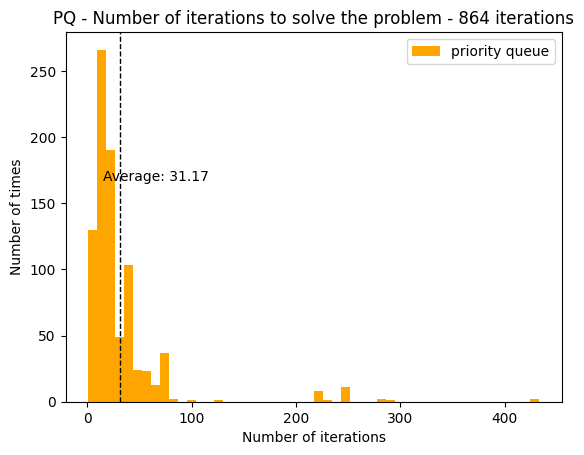

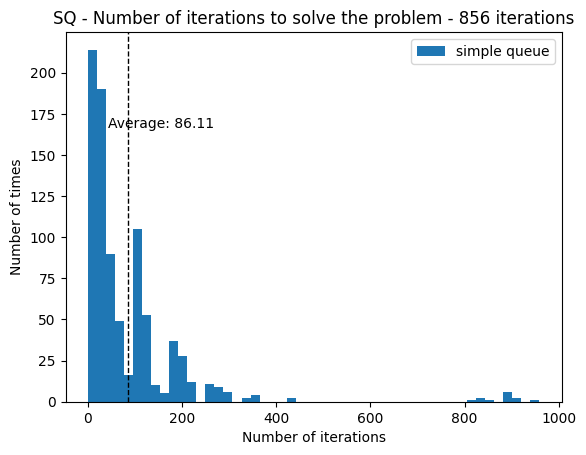

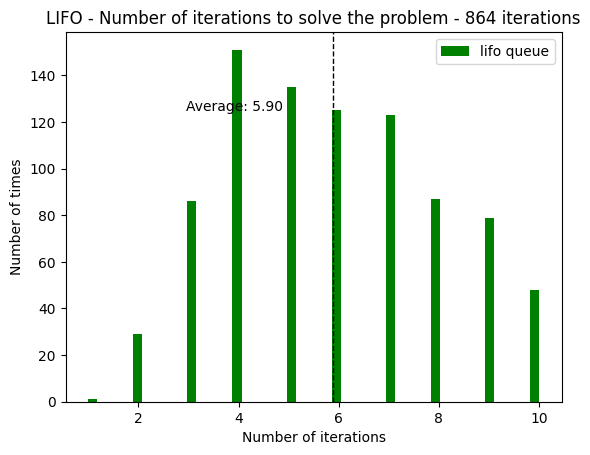

In [18]:

plt.hist(pq_steps, bins=50, label="priority queue",color='orange')
# add a vertical line at the average and the value
plt.axvline(pq_mean, color='k', linestyle='dashed', linewidth=1)
plt.text(pq_mean/2, N_ITERS/6, 'Average: {:.2f}'.format(pq_mean))

plt.legend(loc='upper right')
plt.title(f"PQ - Number of iterations to solve the problem - {len(pq_steps)} iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Number of times")
plt.show()


plt.hist(sq_steps, bins=50, label="simple queue")
# add a vertical line at the average and the value
plt.axvline(sq_mean, color='k', linestyle='dashed', linewidth=1)
plt.text(sq_mean/2, N_ITERS/6, 'Average: {:.2f}'.format(sq_mean))

plt.legend(loc='upper right')
plt.title(f"SQ - Number of iterations to solve the problem - {len(sq_steps)} iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Number of times")
plt.show()


plt.hist(lfq_steps, bins=50, label="lifo queue",color='green')
# add a vertical line at the average and the value
plt.axvline(lfq_mean, color='k', linestyle='dashed', linewidth=1)
plt.text(lfq_mean/2, N_ITERS/8, 'Average: {:.2f}'.format(lfq_mean))

plt.legend(loc='upper right')
plt.title(f"LIFO - Number of iterations to solve the problem - {len(lfq_steps)} iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Number of times")
plt.show()

The significant difference in the average number of iterations required to solve the set covering problem using a priority queue (PQ) versus a simple queue could be attributed to the search strategy and the order in which states (subsets) are explored. 


**Priority Queue (PQ):**
   
   - Use a heuristic or priority score to determine the order in which states are extracted for exploration. In this context it allows to prioritize states that are more likely to lead to a solution. For example, if a state already covers a significant portion of the universal set U, it might be given higher priority.

   - More likely to explore promising states first and may lead to finding solutions with fewer iterations on average. This is similar to a best-first search strategy, where you prioritize exploration based on some measure of potential success.

**Simple Queue:**
   
   - Typically follow a first-in, first-out (FIFO) order. States are explored in the order they were added to the queue, without considering their potential to lead to a solution. This can result in exploring states that are less likely to help cover the universal set, leading to a larger number of iterations on average.

   - The simple queue approach explores states in a less guided manner and may require more iterations to find a solution, especially if the search space is large and complex.

